In [1]:
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.data_handler.dataloader import load_citations, load_raw_papers, load_taxonomy, load_category, load_raw_cs_papers, load_version
from get_clean_text import load_cs_papers

from src.citations.utils import filter_citations_to_subset

# Exploratory Data Analysis

## Data Loading

In [2]:
papers = load_raw_papers()
papers

,id,title,abstract,authors,journal-ref,license
0,0704.0001,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...","Phys.Rev.D76:013009,2007",NaN
1,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",Ileana Streinu and Louis Theran,NaN,http://arxiv.org/licenses/nonexclusive-distrib...
2,0704.0003,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,Hongjun Pan,NaN,NaN
3,0704.0004,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,David Callan,NaN,NaN
4,0704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,Wael Abu-Shammala and Alberto Torchinsky,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN
...,...,...,...,...,...,...
2440871,supr-con/9608008,On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",NaN,NaN
2440872,supr-con/9609001,Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,"Durga P. Choudhury, Balam A. Willemsen, John S...",NaN,NaN
2440873,supr-con/9609002,Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",NaN,NaN
2440874,supr-con/9609003,Density of States and NMR Relaxation Rate in A...,We show that the density of states in an ani...,Yasumasa Hasegawa (Himeji Institute of Technol...,NaN,NaN


In [3]:
versions = load_version()
versions

,id,year,month
0,0704.0001,2007,4
1,0704.0002,2007,3
2,0704.0003,2007,4
3,0704.0004,2007,3
4,0704.0005,2007,4
...,...,...,...
2440871,supr-con/9608008,1996,8
2440872,supr-con/9609001,1996,8
2440873,supr-con/9609002,1996,9
2440874,supr-con/9609003,1996,9


In [4]:
citations = load_citations()
citations

,id,id_reference
0,alg-geom/9412010,alg-geom/9509005
1,alg-geom/9412020,alg-geom/9505009
2,alg-geom/9412012,alg-geom/9407002
3,alg-geom/9412017,alg-geom/9411005
4,alg-geom/9412017,alg-geom/9310001
...,...,...
6849628,hep-lat/0004009,hep-lat/0002004
6849629,hep-lat/0004009,hep-lat/9907024
6849630,hep-lat/0004009,hep-lat/0004002
6849631,hep-lat/0004009,hep-lat/9907028


In [5]:
cat = load_category()
cat

,id,category_id
0,0704.0001,hep-ph
1,0704.0002,math.CO
2,0704.0002,cs.CG
3,0704.0003,physics.gen-ph
4,0704.0004,math.CO
...,...,...
4146776,supr-con/9609002,cond-mat.supr-con
4146777,supr-con/9609003,supr-con
4146778,supr-con/9609003,cond-mat.supr-con
4146779,supr-con/9609004,supr-con


In [6]:
tax = load_taxonomy()
tax

,group_name,archive_name,archive_id,category_name,category_id,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
...,...,...,...,...,...,...
150,Statistics,Statistics,Statistics,Computation,stat.CO,"Algorithms, Simulation, Visualization"
151,Statistics,Statistics,Statistics,Methodology,stat.ME,"Design, Surveys, Model Selection, Multiple Tes..."
152,Statistics,Statistics,Statistics,Machine Learning,stat.ML,"Covers machine learning papers (supervised, un..."
153,Statistics,Statistics,Statistics,Other Statistics,stat.OT,Work in statistics that does not fit into the ...


In [7]:
papers = load_raw_cs_papers()
papers

Loading cs papers


,id,title,abstract,authors,journal-ref,license
0,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",Ileana Streinu and Louis Theran,NaN,http://arxiv.org/licenses/nonexclusive-distrib...
1,0704.0046,A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldma...","I. Csiszar, F. Hiai and D. Petz","J. Math. Phys. 48(2007), 092102.",NaN
2,0704.0047,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is...,T. Kosel and I. Grabec,NaN,NaN
3,0704.0050,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emi...,T. Kosel and I. Grabec,NaN,NaN
4,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...","Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",Algorithms in Bioinformatics: 7th Internationa...,NaN
...,...,...,...,...,...,...
604848,quant-ph/9909094,Quantum Computation and Quadratically Signed W...,We prove that quantum computation is polynom...,"E. Knill, R. Laflamme",NaN,NaN
604849,quant-ph/9910033,Almost-Everywhere Superiority for Quantum Comp...,Simon as extended by Brassard and H{\o}yer s...,"Edith Hemaspaandra (RIT), Lane A. Hemaspaandra...",NaN,NaN
604850,quant-ph/9910087,Unconditionally Secure Commitment of a Certifi...,In a secure bit commitment protocol involvin...,"Adrian Kent (DAMTP, University of Cambridge)","Phys. Rev. A 61, 042301 (2000)",NaN
604851,quant-ph/9911043,Cheat Sensitive Quantum Bit Commitment,We define cheat sensitive cryptographic prot...,Lucien Hardy (The Perimeter Institute) and Adr...,"Phys. Rev. Lett. 92, 157901 (2004).",NaN


In [8]:
papers_pre_2019 = versions[versions['year'] < 2019]

papers_pre_2019 = papers.merge(papers_pre_2019, how='inner', on='id')
papers_pre_2019

,id,title,abstract,authors,journal-ref,license,year,month
0,0704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",Ileana Streinu and Louis Theran,NaN,http://arxiv.org/licenses/nonexclusive-distrib...,2007,3
1,0704.0046,A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldma...","I. Csiszar, F. Hiai and D. Petz","J. Math. Phys. 48(2007), 092102.",NaN,2007,4
2,0704.0047,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is...,T. Kosel and I. Grabec,NaN,NaN,2007,4
3,0704.0050,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emi...,T. Kosel and I. Grabec,NaN,NaN,2007,4
4,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...","Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",Algorithms in Bioinformatics: 7th Internationa...,NaN,2007,3
...,...,...,...,...,...,...,...,...
195531,quant-ph/9909094,Quantum Computation and Quadratically Signed W...,We prove that quantum computation is polynom...,"E. Knill, R. Laflamme",NaN,NaN,1999,9
195532,quant-ph/9910033,Almost-Everywhere Superiority for Quantum Comp...,Simon as extended by Brassard and H{\o}yer s...,"Edith Hemaspaandra (RIT), Lane A. Hemaspaandra...",NaN,NaN,1999,10
195533,quant-ph/9910087,Unconditionally Secure Commitment of a Certifi...,In a secure bit commitment protocol involvin...,"Adrian Kent (DAMTP, University of Cambridge)","Phys. Rev. A 61, 042301 (2000)",NaN,1999,10
195534,quant-ph/9911043,Cheat Sensitive Quantum Bit Commitment,We define cheat sensitive cryptographic prot...,Lucien Hardy (The Perimeter Institute) and Adr...,"Phys. Rev. Lett. 92, 157901 (2004).",NaN,1999,11


In [24]:
papers_pre_2019[~papers_pre_2019['journal-ref'].isna()]

,id,title,abstract,authors,journal-ref,license,year,month
1,0704.0046,A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldma...","I. Csiszar, F. Hiai and D. Petz","J. Math. Phys. 48(2007), 092102.",NaN,2007,4
4,0704.0062,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...","Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",Algorithms in Bioinformatics: 7th Internationa...,NaN,2007,3
6,0704.0098,Sparsely-spread CDMA - a statistical mechanics...,"Sparse Code Division Multiple Access (CDMA),...","Jack Raymond, David Saad",J. Phys. A: Math. Theor. 40 No 41 (12 October ...,NaN,2007,4
9,0704.0217,Capacity of a Multiple-Antenna Fading Channel ...,Given a multiple-input multiple-output (MIMO...,Wiroonsak Santipach and Michael L. Honig,"IEEE Trans. Inf. Theory, vol. 55, no. 3, pp. 1...",http://arxiv.org/licenses/nonexclusive-distrib...,2007,4
13,0704.0301,Differential Recursion and Differentially Alge...,"Moore introduced a class of real-valued ""rec...",Akitoshi Kawamura,Revised and published in ACM Trans. Comput. Lo...,NaN,2007,4
...,...,...,...,...,...,...,...,...
195528,quant-ph/9906103,Secure Classical Bit Commitment using Fixed Ca...,If mutually mistrustful parties A and B cont...,"Adrian Kent (Centre for Quantum Computation, U...",J.Cryptolog. 18 (2005) 313-335,NaN,1999,6
195529,quant-ph/9907009,The importance of quantum decoherence in brain...,Based on a calculation of neural decoherence...,Max Tegmark,"Phys.Rev.E61:4194-4206,2000",NaN,1999,7
195530,quant-ph/9909012,Analysis of Quantum Functions,This paper initiates a systematic study of q...,Tomoyuki Yamakami,International Journal of Foundations of Comput...,NaN,1999,9
195533,quant-ph/9910087,Unconditionally Secure Commitment of a Certifi...,In a secure bit commitment protocol involvin...,"Adrian Kent (DAMTP, University of Cambridge)","Phys. Rev. A 61, 042301 (2000)",NaN,1999,10


In [9]:
papers_cats = [sub_df['category_id'].to_list() for paper, sub_df in papers_pre_2019[['id']].merge(cat, how='left', on='id').groupby("id")]

In [12]:
cat_counts = {}

for paper_cat in papers_cats:
    for cat in paper_cat:
        if cat in cat_counts:
            cat_counts[cat] += 1
        else:
            cat_counts[cat] = 1
cat_counts = sorted([(k, v) for k, v in cat_counts.items()], key=lambda x: -x[1])

In [32]:
sum([count for paper, count in cat_counts])

370670

In [27]:
cat_counts_to_plot = [(paper, count) for paper, count in cat_counts if paper not in ['math.IT']]

In [35]:
cat_counts_to_plot

[('cs.LG', 27889),
 ('cs.IT', 27168),
 ('cs.CV', 24130),
 ('stat.ML', 17655),
 ('cs.AI', 17244),
 ('cs.DS', 12481),
 ('cs.CL', 11643),
 ('cs.NI', 11209),
 ('cs.CR', 9861),
 ('cs.SI', 9314),
 ('cs.LO', 8884),
 ('cs.DC', 8625),
 ('cs.DM', 7665),
 ('cs.SY', 7643),
 ('physics.soc-ph', 6773),
 ('cs.CC', 6399),
 ('math.OC', 6322),
 ('cs.NE', 5752),
 ('math.CO', 5683),
 ('cs.CY', 5606),
 ('cs.SE', 5478),
 ('cs.RO', 5400),
 ('cs.GT', 5173),
 ('cs.IR', 5156),
 ('cs.DB', 4005),
 ('cs.PL', 3783),
 ('cs.CG', 3680),
 ('cs.HC', 3627),
 ('quant-ph', 3258),
 ('cs.NA', 3193),
 ('cs.CE', 2913),
 ('math.NA', 2678),
 ('cs.DL', 2665),
 ('cs.FL', 2533),
 ('math.PR', 2259),
 ('cs.MA', 2225),
 ('cs.SD', 1995),
 ('cs.MM', 1938),
 ('cs.OH', 1761),
 ('cs.PF', 1681),
 ('math.ST', 1639),
 ('stat.TH', 1639),
 ('stat.AP', 1431),
 ('cond-mat.stat-mech', 1412),
 ('cs.SC', 1412),
 ('cs.ET', 1412),
 ('cs.GR', 1374),
 ('physics.data-an', 1296),
 ('cs.AR', 1217),
 ('cs.MS', 1216),
 ('math.LO', 1156),
 ('eess.SP', 1140),
 

Text(0.5, 1.0, 'Papers in each category')

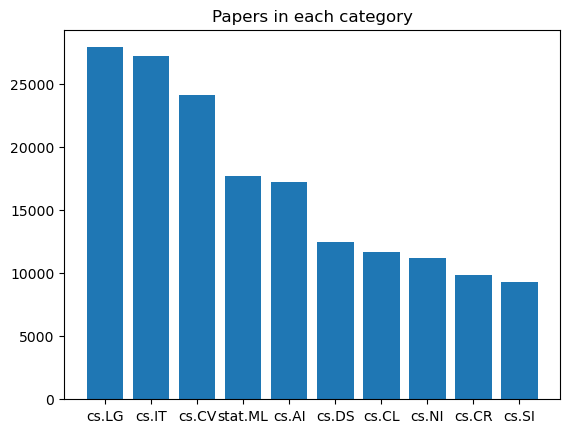

In [34]:
x, y = zip(*cat_counts_to_plot)
plt.bar(x[:10], y[:10])
plt.title("Papers in each category")

In [16]:
tax[tax['group_name'] == 'Computer Science']

,group_name,archive_name,archive_id,category_name,category_id,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
5,Computer Science,Computer Science,Computer Science,Computation and Language,cs.CL,Covers natural language processing. Roughly in...
6,Computer Science,Computer Science,Computer Science,Cryptography and Security,cs.CR,Covers all areas of cryptography and security ...
7,Computer Science,Computer Science,Computer Science,Computer Vision and Pattern Recognition,cs.CV,"Covers image processing, computer vision, patt..."
8,Computer Science,Computer Science,Computer Science,Computers and Society,cs.CY,"Covers impact of computers on society, compute..."
9,Computer Science,Computer Science,Computer Science,Databases,cs.DB,"Covers database management, datamining, and da..."


## LaTeX formatting and Abbreviation EDA

In [39]:
from src.text_cleaning import abbreviation_expansion_disambiguation, preprocess, prepare_spacy_nlp
from tqdm import tqdm

In [38]:
preprocess(papers_pre_2019['abstract'], trace_count=2)

(0         We describe a new algorithm, the [EQN_LATEX]-p...
 1         In a quantum mechanical model, Diosi, Feldmann...
 2         The intelligent acoustic emission locator is d...
 3         Part I describes an intelligent acoustic emiss...
 4         In this paper, we introduce the on-line Viterb...
                                 ...                        
 195531    We prove that quantum computation is polynomia...
 195532    Simon as extended by Brassard and Hoyer shows ...
 195533    In a secure bit commitment protocol involving ...
 195534    We define cheat sensitive cryptographic protoc...
 195535    An approach to the solution of NP-complete pro...
 Name: abstract, Length: 195536, dtype: object,
 {'new-line-to-space': 195536,
  'strip_whitespace': 195536,
  'latex-to-placeholder': 26762,
  'complexity-to-placeholder': 3972,
  'latex-apostrophy-removal': 34830,
  'latex-citation-removal': 1116,
  'latex-formatting-removal': 3459,
  'latex-formatting-alt-removal': 6058})

In [43]:
papers_copy = papers_pre_2019.copy(deep=True)
papers_copy['abstract'] = preprocess(papers_copy['abstract'], trace_count=0)

In [44]:
nlp = prepare_spacy_nlp()
pipes_to_disable = ['tagger', 'parser', 'ner', 'lemmatizer', 'textcat', 'tok2vec', 'attribute_ruler']

tokenized_abstracts = nlp.pipe(papers_copy['abstract'], disable=pipes_to_disable)

disambiguated_text = []

for doc in tqdm(tokenized_abstracts, total=papers_copy.shape[0]):

    text = abbreviation_expansion_disambiguation(doc, trace_count=2)
    disambiguated_text.append(text)
 
pd.Series(disambiguated_text)

  0%|          | 0/195536 [00:00<?, ?it/s]c:\Users\pooh_\OneDrive\NUS Notes\CS5246 Text Mining\Project\ArXiv-Dataset-T14\src\scispacy\abbreviation.py:260: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
100%|██████████| 195536/195536 [01:43<00:00, 1896.23it/s]


0         (We describe a new algorithm, the [EQN_LATEX]-...
1         (In a quantum mechanical model, Diosi, Feldman...
2         (The intelligent acoustic emission locator is ...
3         (Part I describes an intelligent acoustic emis...
4         (In this paper, we introduce the on-line Viter...
                                ...                        
195531    (We prove that quantum computation is polynomi...
195532    (Simon as extended by Brassard and Hoyer shows...
195533    (In a secure bit commitment protocol involving...
195534    (We define cheat sensitive cryptographic proto...
195535    (An approach to the solution of NP-complete pr...
Length: 195536, dtype: object

In [66]:
_, abbvs_dicts = zip(*disambiguated_text)
abbvs_dicts = [dic for dic in abbvs_dicts if dic]
list_of_abbvs = [key for abbvs_dict in abbvs_dicts for key in abbvs_dict.keys()]
len(list_of_abbvs), len(abbvs_dicts)

(122625, 70158)

In [85]:
full, abbv = zip(*list_of_abbvs)
full_series = pd.Series(full).str.lower()
full_series.value_counts().head(15)

convolutional neural networks      1421
convolutional neural network       1035
multiple-input multiple-output      808
channel state information           800
internet of things                  641
base station                        546
deep neural networks                538
quality of service                  505
reinforcement learning              481
signal-to-noise ratio               478
generative adversarial networks     464
recurrent neural networks           448
base stations                       380
long short-term memory              349
wireless sensor networks            327
Name: count, dtype: int64

In [89]:
abbv_series = pd.Series(abbv).str.lower()
abbv_series.value_counts().head(15)

cnn     1499
mimo    1258
cnns    1026
csi      835
iot      750
qos      679
bs       635
snr      635
ml       593
lstm     522
rl       501
cs       478
rnn      457
dnns     434
mac      416
Name: count, dtype: int64

In [105]:
pd.concat([full_series.value_counts().head(15).reset_index(), abbv_series.value_counts().head(15).rename("abbv_count").reset_index()], axis=1)

,index,count,index,abbv_count
0,convolutional neural networks,1421,cnn,1499
1,convolutional neural network,1035,mimo,1258
2,multiple-input multiple-output,808,cnns,1026
3,channel state information,800,csi,835
4,internet of things,641,iot,750
5,base station,546,qos,679
6,deep neural networks,538,bs,635
7,quality of service,505,snr,635
8,reinforcement learning,481,ml,593
9,signal-to-noise ratio,478,lstm,522
